## Practical Session (Deep Learning for Image Analysis / Master IASD)
### Santiago VELASCO-FORERO
email: Santiago.Velasco@Mines-Paristech.fr


In this practical session you have to effectively train a network for the Fashion MNIST database, with a limited number of 4000 training images.  
A proposed network does not learn, and you must modify it and compare the models.

In [1]:
import tensorflow as tf
import tensorflow.keras.models as km
import tensorflow.keras.layers as kl
import morpholayers.layers as ml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import top_k_accuracy_score
plt.gray()

2023-01-20 08:50:41.512363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 640x480 with 0 Axes>

### Training parameters of Training
(For this homework, you do NOT need to change the following parameters)

In [2]:
TRAINING_SAMPLES=4000
EPOCHS=64
BATCH_SIZE=64
PATIENCE_ES=10 #Patience for Early Stopping
PATIENCE_LR=4 #Patience for ReduceLROnPlateau

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_validation=x_train[40000::]
y_validation=y_train[40000::]
x_train=x_train[0:TRAINING_SAMPLES]
y_train=y_train[0:TRAINING_SAMPLES]


You can use the following function to visualize results

In [4]:
def plot_prediction(model,x,y):
    'Plot some images on x and the predictions of model and the ground truth on y'
    'model is a model (is model=None the prediction is nan)'
    'x is an input data'
    'y correct class'
    Grid_W = 6
    Grid_H = 6
    if model is None:
        pred=[np.NaN]*(Grid_W*Grid_H)
    else:
        pred=np.argmax(model.predict(x[0:(Grid_W*Grid_H)]),axis=-1)
    fig, axes = plt.subplots(Grid_H, Grid_W, figsize=(20,20))
    axes = axes.ravel()
    for i in np.arange(0, Grid_H*Grid_W):
        axes[i].imshow(x[i].reshape(28,28))
        axes[i].set_title('Predicted = {:0.1f} \n Actual = {:0.1f}'.format(pred[i], 
                                                                       y[i]))
        axes[i].axis('off')
    plt.show()
        
def plot_history(history):
    'Use the history to plot loss and accuracy curves'
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    #plt.yscale('log')
    plt.legend()
    plt.grid('on')
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'],label='acc')
    plt.plot(history.history['val_accuracy'],label='val_acc')
    plt.ylim([0,1])
    plt.legend()
    plt.grid('on')
    plt.show()
    
def report_model(model,x_test,y_test,x_train,y_train):
    'From a model, it computes a confusion_matrix on x_test,y_test'
    'Additionally, the histogram of last layer per class on x_test'
    'and the top-k accuracy score on both x_test and x_train'
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    confusion_mat = confusion_matrix(y_test, np.argmax(y_pred,axis=-1))
    # Visualize confusion matrix
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    ticks = CLASS_NAMES
    plt.xticks(np.arange(len(CLASS_NAMES)), np.arange(len(CLASS_NAMES)))
    plt.yticks(np.arange(len(CLASS_NAMES)), ticks)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
    plt.figure()
    Grid_W = 10
    Grid_H = 1
    fig, axes = plt.subplots(Grid_H, Grid_W, figsize=(20,5))
    axes = axes.ravel()
    for i in np.arange(0, Grid_H*Grid_W):
        axes[i].hist(y_pred[y_test==i,i],density=True)
        axes[i].set_title('Class '+ CLASS_NAMES[i])
        axes[i].axis('off')
    plt.show()
    
    plt.figure()
    res_test=[]
    res_train=[]
    for i in range(1,5):
        res_test.append(top_k_accuracy_score(y_test, y_pred,k=i))
        res_train.append(top_k_accuracy_score(y_train, y_pred_train,k=i))
    plt.plot(range(1,5),res_test,label='test')
    plt.plot(range(1,5),res_train,label='train')
    plt.ylabel('top_k_accuracy_score')
    plt.xlabel('k')
    plt.legend()
    #plt.boxplot(y_pred)
    #plt.xlabel('Class')
    #plt.ylabel('Output of Network')
    #plt.show()
    #print('Accuracy', res[1])

### Useful functions for visualize results.

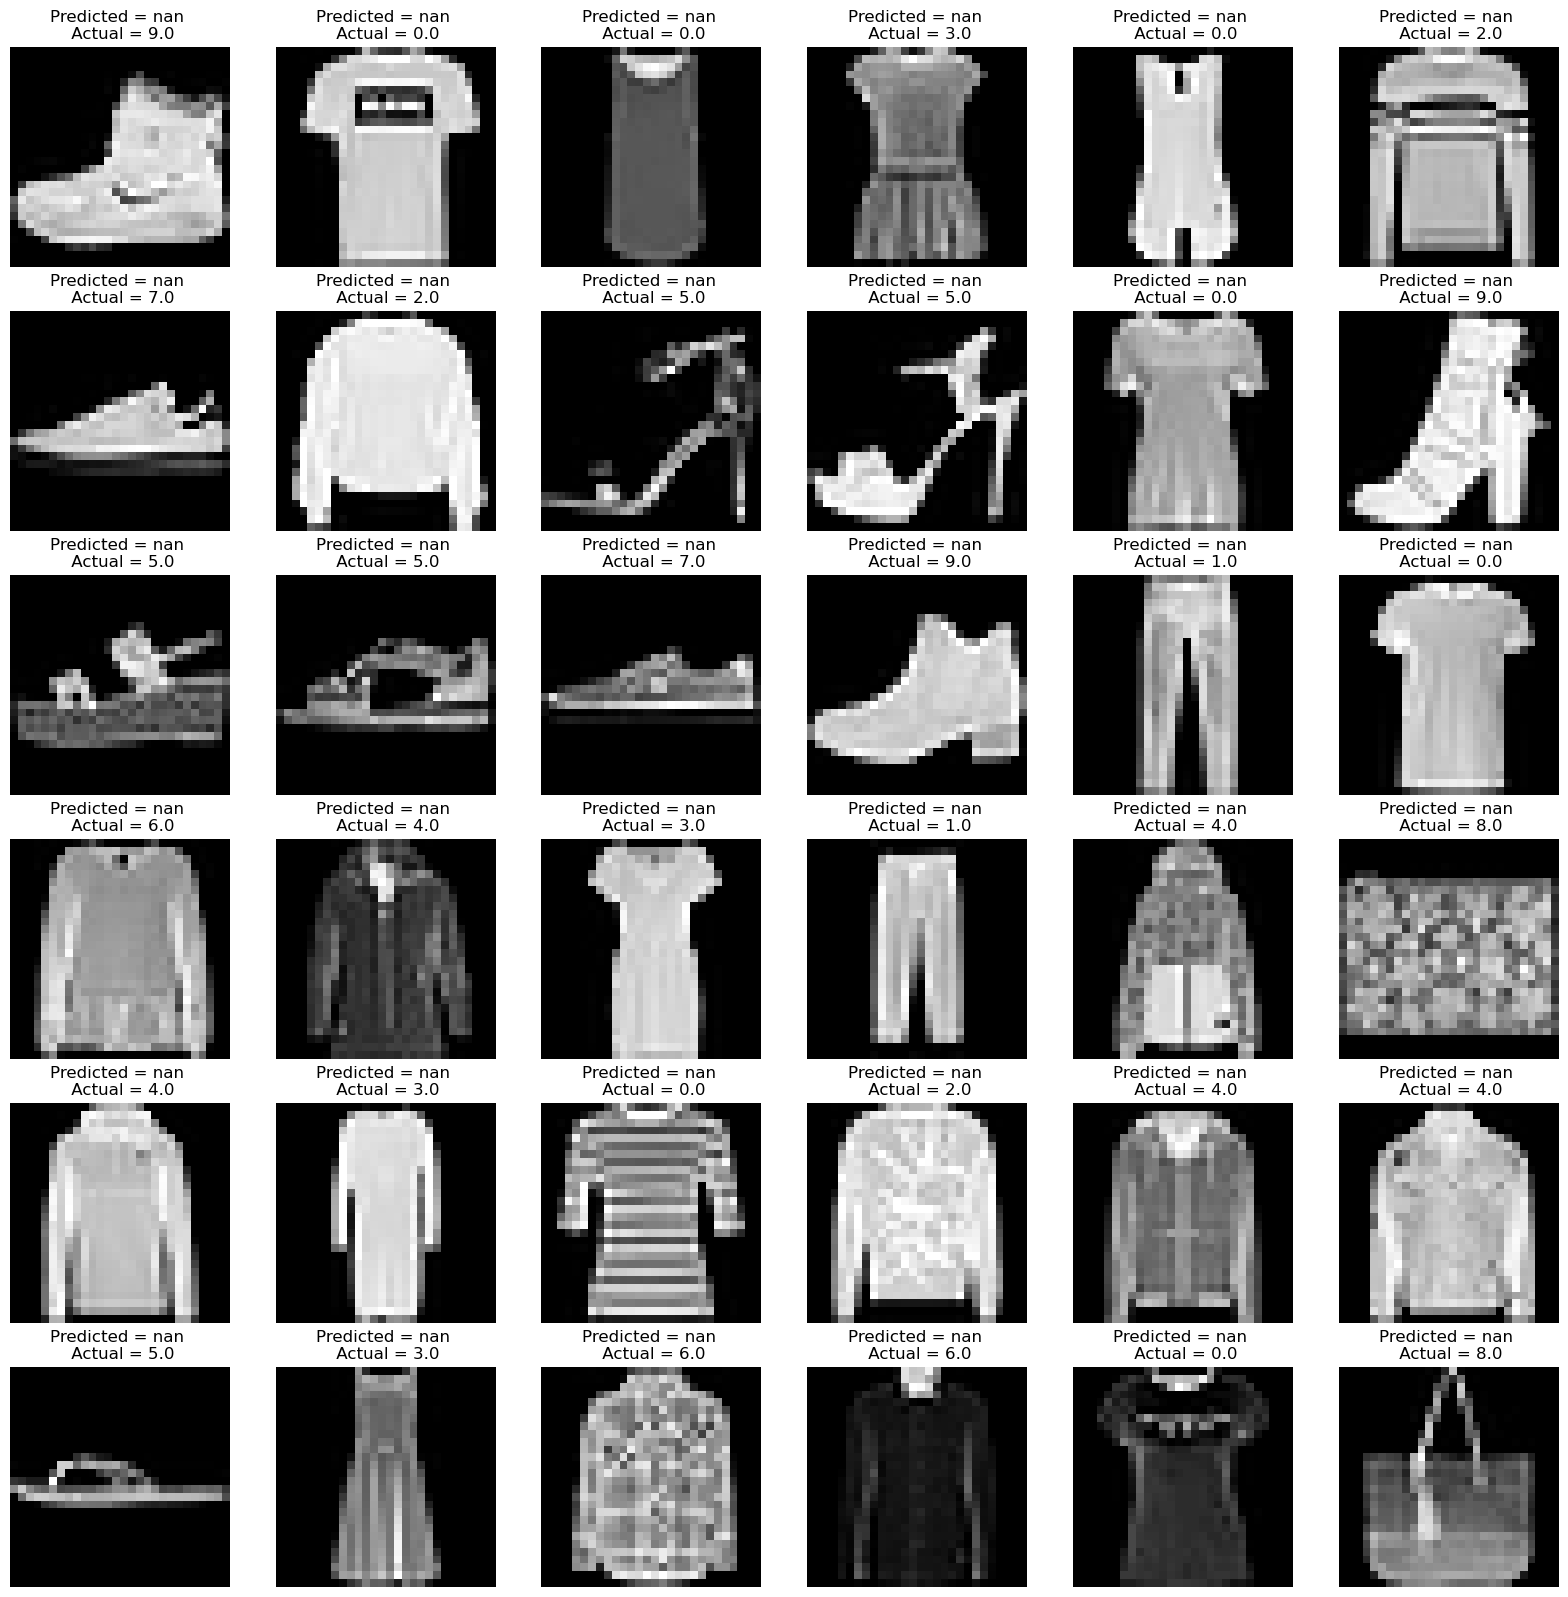

In [5]:
plot_prediction(None,x_train,y_train)

In [6]:
num_classes=10
input_shape = (28, 28, 1)


## Description
We would like to train a two-layer CNN.
-Care must be taken not to overfit the model.

Model0: 
That is the architecture, that you should use in the experiments. (This model in its present form is not useful for solving the problem, i.e it does not learn anything) 

In [7]:
xinput=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
xconv=kl.Conv2D(24,kernel_size=(3,3),padding='valid')(xinput)
xconv=kl.Conv2D(24,kernel_size=(3,3),padding='valid')(xconv)
x=kl.Flatten()(xconv)
xdense=kl.Dense(num_classes)(x)

2023-01-20 08:50:55.514261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model0=km.Model(xinput,xdense)

In [9]:
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 24)        5208      
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 10)                138250    
                                                                 
Total params: 143,698
Trainable params: 143,698
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt=tf.keras.optimizers.SGD(learning_rate=.01)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model0.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history0=model0.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=[x_validation,y_validation],
                    callbacks=CB)




Epoch 1/64
63/63 [==============================] - 9s 136ms/step - loss: 13.2746 - accuracy: 0.1002 - val_loss: 13.6585 - val_accuracy: 0.0991 - lr: 0.0100
Epoch 2/64
63/63 [==============================] - 7s 119ms/step - loss: 13.5514 - accuracy: 0.1025 - val_loss: 13.6585 - val_accuracy: 0.0991 - lr: 0.0100
Epoch 3/64
63/63 [==============================] - 7s 118ms/step - loss: 13.5514 - accuracy: 0.1025 - val_loss: 13.6585 - val_accuracy: 0.0991 - lr: 0.0100
Epoch 4/64
63/63 [==============================] - 7s 115ms/step - loss: 13.5514 - accuracy: 0.1025 - val_loss: 13.6585 - val_accuracy: 0.0991 - lr: 0.0100
Epoch 5/64
63/63 [==============================] - 7s 116ms/step - loss: 13.5514 - accuracy: 0.1025 - val_loss: 13.6585 - val_accuracy: 0.0991 - lr: 0.0100
Epoch 6/64
63/63 [==============================] - 7s 120ms/step - loss: 13.5514 - accuracy: 0.1025 - val_loss: 13.6585 - val_accuracy: 0.0991 - lr: 0.0020
Epoch 7/64
63/63 [==============================] - 7s 118

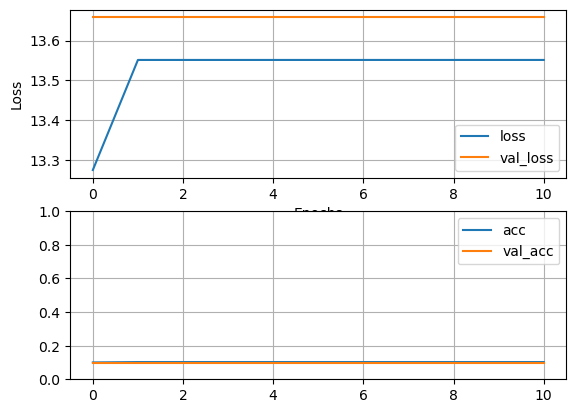

In [11]:
plot_history(history0)



125/125 [==============================] - 1s 8ms/step


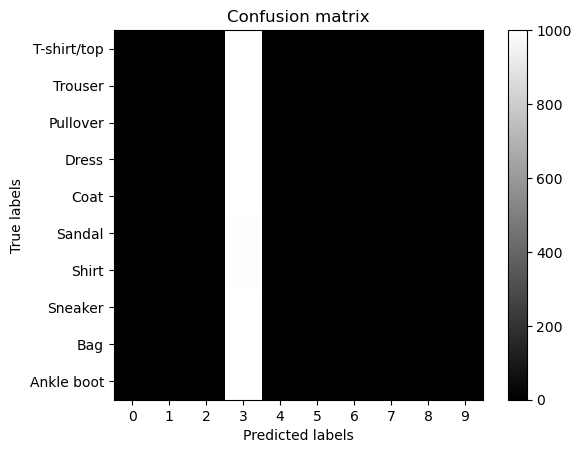

<Figure size 640x480 with 0 Axes>

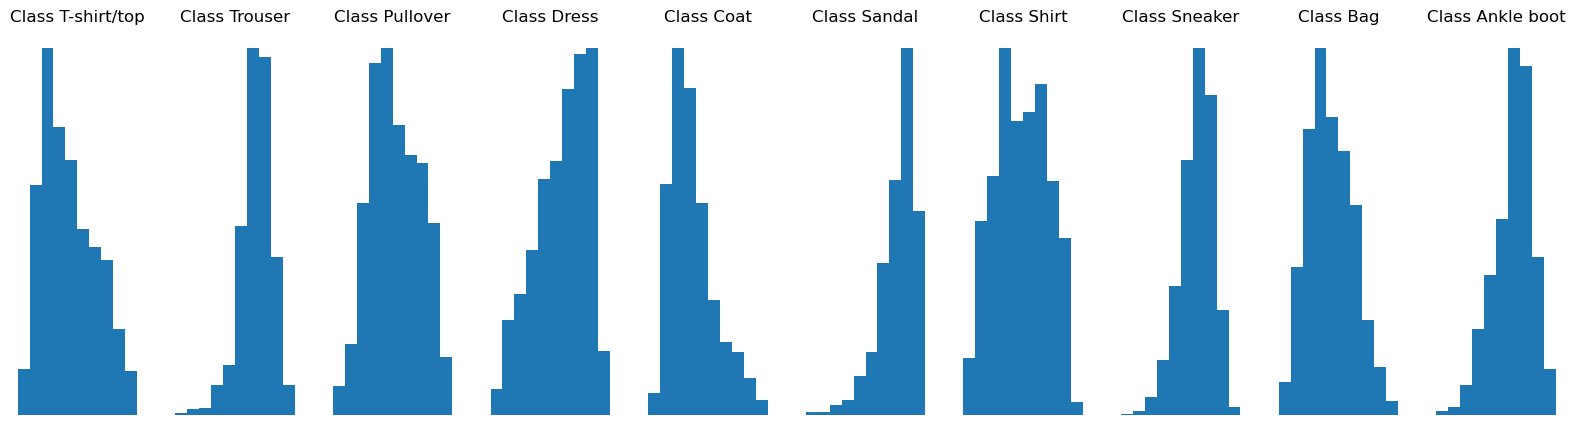

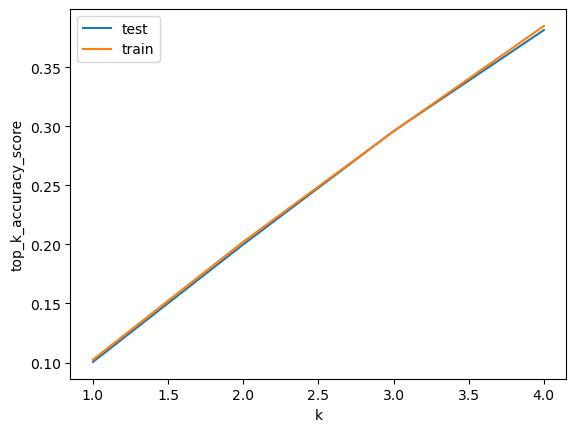

In [12]:
report_model(model0,x_test,y_test,x_train,y_train)


2/2 [==============================] - 0s 4ms/step


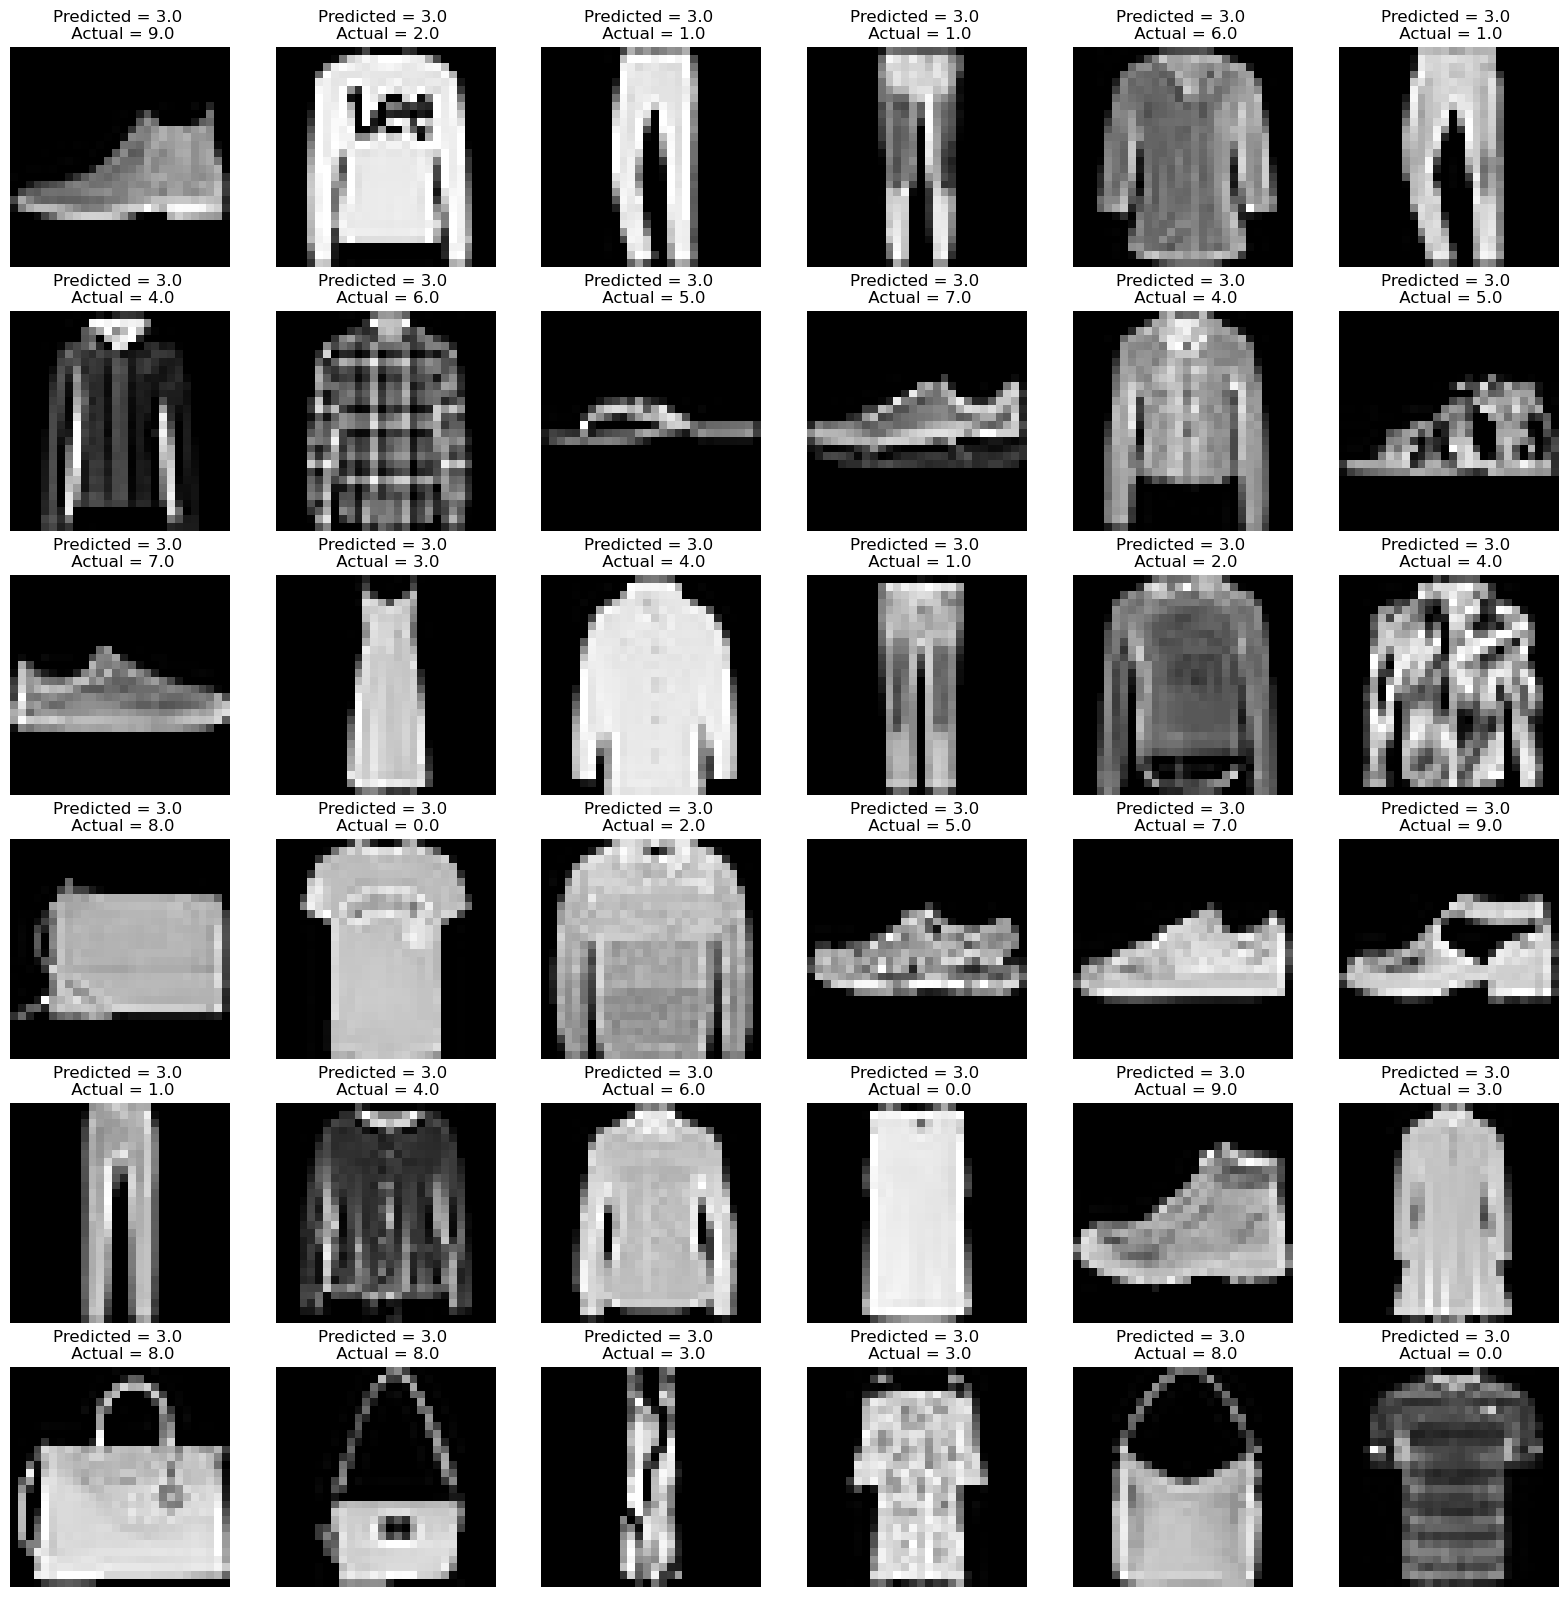

In [13]:
plot_prediction(model0,x_test,y_test)

The previous model does not works!


## Questions:

- Model1:
  - Use adecuate activation function in each layer.
  Is there an improvement in the results? Explain.
  
- Model2:
  - Use other optimizer ADAM with learning_rate=.001
  Is there an improvement in the results? Explain.
  
- Model3:
  - Include Dropout to Last Layer of the Model.
  Is there an improvement in the results? Explain.
  
- Model4:
  - Include BatchNormalization to the Model: 
     - (BN before activation)
     - (Do not use the bias in layers where the BN is applied)
  Is there an improvement in the results? Explain.
  
- Model5:
  - Include Gaussian Noise Layer of the Model (The parameter depends on the range of input values)
  Is there an improvement in the results? Explain.
  
- Model6:
  - Include Dropout all layers to the Model.
  Is there an improvement in the results? Explain.

### Write a conclusion of what did you observe during this practical session.



#### BONUS QUESTIONS:  (The grade will be assigned according to the previous questions and the conclusion below. Extra points will be given, if you solve the following questions.)

- 7. Use another Normalization instead of BatchNormalization.
     Is there an improvement in the results? Explain.

- 8. Is it possible to design a model invariant to additive addition, i.e, a model such that model(x)=model(x+c) for all c and for all x? x is a image, a c is a real number. Implementation and Test of Invariance properties (Plot the norm of || model(x_train+c)-model(x_train)||_2^2). (There are many possible solutions to this problem.)








In [14]:
#Solution MODEL1
xinput1=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2])
...
xoutput1=
model1=km.Model(xinput1,xoutput1)

SyntaxError: invalid syntax (977449639.py, line 3)

In [ ]:
opt=tf.keras.optimizers.SGD(learning_rate=.01)
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]

model1.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)


In [ ]:
plot_history(history1)
report_model(model1,x_test,y_test,x_train,y_train)
#plot_prediction(model1,x_test,y_test)

In [ ]:
#Solution MODEL2

In [ ]:
xinput2=kl.Input(shape=(input_shape[0],input_shape[1],input_shape[2])
...
xoutput2=
model2=km.Model(xinput1,xoutput1)

In [ ]:
model2=km.Model(xinput,xdense)
opt=
CB=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=PATIENCE_ES),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=PATIENCE_LR)]
model2.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_validation,y_validation),
                    callbacks=CB)

In [ ]:
plot_history(history2)
report_model(model2,x_test,y_test,x_train,y_train)
#plot_prediction(model2,x_test,y_test)

In [ ]:
## Comparing the trained models
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'],label='Model1')
plt.plot(history2.history['accuracy'],label='Model2')
plt.plot(history3.history['accuracy'],label='Model3')
plt.plot(history4.history['accuracy'],label='Model4')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.ylim([0,1])
plt.grid()
plt.subplot(1,2,2)
plt.plot(history1.history['val_accuracy'],label='Model1')
plt.plot(history2.history['val_accuracy'],label='Model2')
plt.plot(history3.history['val_accuracy'],label='Model3')
plt.plot(history4.history['val_accuracy'],label='Model4')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.ylim([0,1])
plt.grid()
plt.legend()
plt.show()